In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from pathlib import Path


In [2]:
BASE_DIR = Path(r"C:\Users\yshel\Downloads\DivyaPath-Ai\data\module4_emotion\fer-2013")
TRAIN_DIR = BASE_DIR / "train"
TEST_DIR = BASE_DIR / "test"

print("Train Path:", TRAIN_DIR)
print("Test Path:", TEST_DIR)


Train Path: C:\Users\yshel\Downloads\DivyaPath-Ai\data\module4_emotion\fer-2013\train
Test Path: C:\Users\yshel\Downloads\DivyaPath-Ai\data\module4_emotion\fer-2013\test


In [3]:
img_size = 48
batch_size = 64

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=batch_size
)

test_data = test_gen.flow_from_directory(
    TEST_DIR,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=batch_size
)

print(train_data.class_indices)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(7, activation="softmax")
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 64)        256       
 chNormalization)                                                
                                                        

In [6]:
epochs = 20

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs
)


Epoch 1/20
449/449 [==============================] - 153s 338ms/step - loss: 1.8420 - accuracy: 0.2817 - val_loss: 1.7383 - val_accuracy: 0.3270
Epoch 2/20
449/449 [==============================] - 93s 207ms/step - loss: 1.6602 - accuracy: 0.3416 - val_loss: 1.4981 - val_accuracy: 0.4149
Epoch 3/20
449/449 [==============================] - 40s 89ms/step - loss: 1.5804 - accuracy: 0.3806 - val_loss: 1.4889 - val_accuracy: 0.4238
Epoch 4/20
449/449 [==============================] - 38s 85ms/step - loss: 1.5153 - accuracy: 0.4085 - val_loss: 1.4786 - val_accuracy: 0.4231
Epoch 5/20
449/449 [==============================] - 39s 86ms/step - loss: 1.4670 - accuracy: 0.4349 - val_loss: 1.3015 - val_accuracy: 0.5020
Epoch 6/20
449/449 [==============================] - 39s 86ms/step - loss: 1.4169 - accuracy: 0.4552 - val_loss: 1.3094 - val_accuracy: 0.4987
Epoch 7/20
449/449 [==============================] - 39s 88ms/step - loss: 1.3827 - accuracy: 0.4703 - val_loss: 1.3691 - val_accura

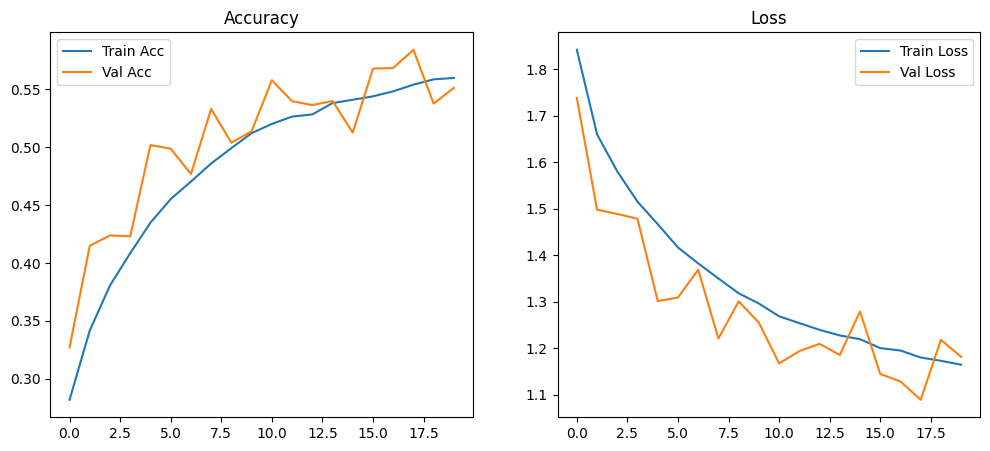

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.legend()

plt.show()


In [9]:
MODEL_DIR = Path("C:\\Users\\yshel\Downloads\\DivyaPath-Ai\\models")
MODEL_DIR.mkdir(exist_ok=True)

model_path = MODEL_DIR / "emotion_model.h5"
model.save(model_path)

print("Model saved at:", model_path)


Model saved at: C:\Users\yshel\Downloads\DivyaPath-Ai\models\emotion_model.h5


c:\Users\yshel\anaconda3\envs\divyapath\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
